### Bitgrit Inc., Machine Learning Competition-I

Yaghdev Paliwal

The Problem is approached using following three algorithms
1. Auto encoders &gt; focussed on using data containing expressive feelings such as joy, enjoy
feeling, anger and so on.
2. SVM Classifier &gt; friend count, status counts , account count
3. Multinomial Bayes &gt; To confirm the findings and list a spammer

Challenges:
The Problem set attributes are derived from sentiment analysis, content analysis and topic modelling.
Therefore a single algorithm is not used but multiple algorithms are used to #predict the outliers.
Algorithm description &amp; Attributes Used:
1) Auto encoder:
An autoencoder neural network is an unsupervised learning algorithm that applies backpropagation, setting the target values to be equal to the inputs. I.e., it uses y(i)=x(i). The auto encoder tries to learn a function hW,b(x)≈x. In other words, it is trying to learn an approximation to the identity function, so as to output x^ that is similar to x. An autoencoder learns to compress data from the input layer into a short code, and then uncompress that code into something that closely matches the original data. This forces the autoencoder to engage in dimensionality reduction, for example by learning how to ignore noise.

Autoencoder finds the low dimensional representation of input data, In our Problem set matrix derived from content analysis include the emotion in the form of Anger, Disgust, Fear, Joy etc. To process the data we needs an algorithm that work real well with low dimensional data.
The following is the model loss for the Auto encoder program
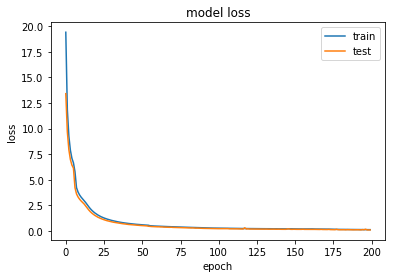

Number of users Spammed by the Autoencoder 398

#2) SVM Classifier:
 The best thing about SVM is working with high dimensional data, In our Problem set statusesCount, followersCount, friendsCount, listedCount, and Account Age needs to be analysed, therefore we need  an algorithm that can predict the outliers in high dimension.
We have used following techniques if the user is spamming or not. We have distributed dataset into training and test. On the test dataset (which we are using for Prediction if user is Spamming) , if user is spam then finding the word cloud as a second step and pass that to Auto encoder. We run trained Autoencoder, if the thresholdis above 0.75 then it is assumed that the user is spammer by Autoencoder as well.  
 
 Number of users Spammed by the SVM Classifier 799
 
 In the Same Test Data If we train SVM classifier to detect the  outliers on the test data. If the same user is identified as spammer by the both algorithms, then the user is considered as spammer. 


#3) Multinomial Bayes:
We have trained Multinomial Bayes Alogorithm on the word used by the user, on Labels (0,1) i.e. 1 for user that is spammed and 0 not by above both algorithms.

In this way Multinomial Bayes algorithm learn that which word a spammed by a user. Number of users Spammed by the Both Autoencoder & SVM Classifier are 98

The accuracy of the model is 96.1% with the following confusion matrix 
Confusion matrix:

[[961   7]
 [ 32   0]]

In the end we have made a cloud of word used by the Spammed User that are confirmed as spammer by both algorithms.


In [464]:
import pandas as pd
import numpy as np
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from  sklearn.svm import OneClassSVM
from  sklearn import svm
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer 
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from sklearn.linear_model import LogisticRegression
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [465]:
#Importing Data
dataframe = pd.read_excel("Twitter Spam.xlsx")

# Removing the mean and scaling to unit variance for m column to best work woth SVM classifier

dataframe['statusesCount'] = StandardScaler().fit_transform(dataframe['statusesCount'].values.reshape(-1, 1))
dataframe['followersCount'] = StandardScaler().fit_transform(dataframe['followersCount'].values.reshape(-1, 1))
dataframe['favoritesCount'] = StandardScaler().fit_transform(dataframe['favoritesCount'].values.reshape(-1, 1))
dataframe['friendsCount'] = StandardScaler().fit_transform(dataframe['friendsCount'].values.reshape(-1, 1))
dataframe['listedCount'] = StandardScaler().fit_transform(dataframe['listedCount'].values.reshape(-1, 1))
dataframe['Account Age'] = StandardScaler().fit_transform(dataframe['Account Age'].values.reshape(-1, 1))

C:\Users\Krishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [466]:
#Joining Words into Single column to feed the text in CountVectorizer 

dataframe["text"] = dataframe.iloc[:, 21:46].apply(lambda x: ' '.join(x.map(str)), axis=1)

In [467]:
#spliting the Data 
X_train_main, X_test_main = train_test_split(dataframe, test_size=0.40)

# Data for Autoencoder
X_train_autoencoder = X_train_main.iloc[:, 2:13]
X_test_autoencoder = X_test_main.iloc[:, 2:13]

In [468]:
#AutoEncoder

input_dim = X_train_autoencoder.shape[1]
encoding_dim = 14

In [469]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [470]:
#Training AutoEncoder
nb_epoch = 200
batch_size = 32
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="autoencoder.h5", verbose=0, save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',histogram_freq=0,write_graph=True, write_images=True)
history = autoencoder.fit(X_train_autoencoder, X_train_autoencoder,epochs=nb_epoch,batch_size=batch_size,
                    shuffle=True,validation_data=(X_test_autoencoder, X_test_autoencoder),verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 6000 samples, validate on 4000 samples
Epoch 1/200
6000/6000 [==============================] - 1s 150us/step - loss: 19.4061 - acc: 0.1560 - val_loss: 13.4093 - val_acc: 0.7328
Epoch 2/200
6000/6000 [==============================] - 1s 89us/step - loss: 11.8783 - acc: 0.7500 - val_loss: 9.7008 - val_acc: 0.7338
Epoch 3/200
6000/6000 [==============================] - 1s 90us/step - loss: 9.2650 - acc: 0.7500 - val_loss: 7.9462 - val_acc: 0.7338
Epoch 4/200
6000/6000 [==============================] - 1s 89us/step - loss: 7.8890 - acc: 0.7500 - val_loss: 6.9804 - val_acc: 0.7338
Epoch 5/200
6000/6000 [==============================] - 1s 91us/step - loss: 7.1001 - acc: 0.7500 - val_loss: 6.4357 - val_acc: 0.7338
Epoch 6/200
6000/6000 [==============================] - 1s 95us/step - loss: 6.6548 - acc: 0.7500 - val_loss: 6.1436 - val_acc: 0.7338
Epoch 7/200
6000/6000 [==============================] - 1s 91us/step - loss: 5.7931 - acc: 0.7500 - val_loss: 4.2330 - val_acc: 0.7

6000/6000 [==============================] - 0s 79us/step - loss: 0.2447 - acc: 0.9705 - val_loss: 0.1942 - val_acc: 0.9845
Epoch 120/200
6000/6000 [==============================] - 1s 104us/step - loss: 0.2400 - acc: 0.9753 - val_loss: 0.2172 - val_acc: 0.9540
Epoch 121/200
6000/6000 [==============================] - 0s 81us/step - loss: 0.2368 - acc: 0.9753 - val_loss: 0.1947 - val_acc: 0.9798
Epoch 122/200
6000/6000 [==============================] - 0s 82us/step - loss: 0.2358 - acc: 0.9753 - val_loss: 0.1930 - val_acc: 0.9812
Epoch 123/200
6000/6000 [==============================] - 0s 81us/step - loss: 0.2382 - acc: 0.9742 - val_loss: 0.1890 - val_acc: 0.9828
Epoch 124/200
6000/6000 [==============================] - 0s 79us/step - loss: 0.2331 - acc: 0.9733 - val_loss: 0.1892 - val_acc: 0.9762
Epoch 125/200
6000/6000 [==============================] - 0s 78us/step - loss: 0.2306 - acc: 0.9760 - val_loss: 0.1874 - val_acc: 0.9820
Epoch 126/200
6000/6000 [======================

Epoch 178/200
6000/6000 [==============================] - 1s 86us/step - loss: 0.1614 - acc: 0.9778 - val_loss: 0.1654 - val_acc: 0.9635
Epoch 179/200
6000/6000 [==============================] - 1s 84us/step - loss: 0.1600 - acc: 0.9762 - val_loss: 0.1309 - val_acc: 0.9748
Epoch 180/200
6000/6000 [==============================] - 0s 77us/step - loss: 0.1586 - acc: 0.9753 - val_loss: 0.1217 - val_acc: 0.9862
Epoch 181/200
6000/6000 [==============================] - 0s 82us/step - loss: 0.1601 - acc: 0.9760 - val_loss: 0.1244 - val_acc: 0.9825
Epoch 182/200
6000/6000 [==============================] - 1s 84us/step - loss: 0.1559 - acc: 0.9797 - val_loss: 0.1180 - val_acc: 0.9855
Epoch 183/200
6000/6000 [==============================] - 1s 89us/step - loss: 0.1488 - acc: 0.9817 - val_loss: 0.1265 - val_acc: 0.9835
Epoch 184/200
6000/6000 [==============================] - 0s 81us/step - loss: 0.1474 - acc: 0.9778 - val_loss: 0.1170 - val_acc: 0.9882
Epoch 185/200
6000/6000 [=========

In [471]:
autoencoder = load_model('autoencoder.h5')

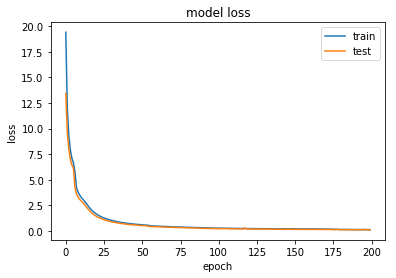

In [472]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [473]:
#Predction of Autoencoder
predictions = autoencoder.predict(X_test_autoencoder)

In [474]:
mse = np.mean(np.power(X_test_autoencoder - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse})

In [493]:
#Setting the threshold for Auto encoder 
threshold = .075

In [494]:
error_df_gr = error_df.query('reconstruction_error>'+str(threshold))
list_enc = error_df_gr.index
print("Number of users Spammed by the Autoencoder "+str(len(list_enc)))

Number of users Spammed by the Autoencoder 398


In [477]:
# Data For SVM Classifier 
X_train_svm = X_train_main.iloc[:, 46:52]
X_test_svm = X_test_main.iloc[:, 46:52]

In [478]:
#training SVM Classiffier 
clf  = svm.OneClassSVM(nu=0.01,  kernel="rbf", gamma=7)
clf.fit(X_train_svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=7, kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [479]:
#rediction of Svm Classifier 
pred = clf.predict(X_test_svm)
normal = X_test_svm[pred == 1]
abnormal = X_test_svm[pred == -1]
list_svm = abnormal.index
print("Number of users Spammed by the SVM Classifier "+str(len(list_svm)))

Number of users Spammed by the SVM Classifier 799


## Finding the Spamer using both the algorithms

In both the algorithms we use same training data with different attributes. The User spmmamed by Number of users Spammed by the Autoencoder are 398 and Number of users Spammed by the SVM Classifier 799 on the same test Data.  Now, we find the Users which are Spammed by the Both Algorithms. Then insert a column in the Test data for one hot encoding. 

One hot Encoding:-
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1


In [495]:
list_res = list(set(list_svm) & set(list_enc))
outlier_users = X_test_svm.loc[list_res]
inlier_index = set(X_test_main.index) - set(outlier_users.index)
X_test_main.loc[list_res, 'Level'] = 1
X_test_main.loc[inlier_index, 'Level'] = 0

print("Number of users Spammed by the Both Autoencoder & SVM Classifier are "+str(len(list_res)))

C:\Users\Krishan\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Number of users Spammed by the Both Autoencoder & SVM Classifier are 98


#### Spliting the Test  Data of Previous Two Algorithms for MultinomialNB to predict common word used by spammed user.

The Number of users Spammed by the Both Autoencoder & SVM Classifier are 98. Now, we need find the common words that are used by the spammers.  So, we need to split the Test data of Autoencoder and SVM classifier because we have our prediction(predicted by both Algorithms) of Outliers only of Test data.

In [496]:
#Spliting the Test  Data of Previous Two Algorithms to predict common word used by spammed user.
x_train_text, y_train_text, X_test_text, y_test_text = train_test_split(X_test_main['text'], X_test_main['Level'], random_state=0)

In [497]:
#CountVectorizer initialized
vectorizer = CountVectorizer(min_df=5).fit(x_train_text)
X_train = vectorizer.transform(x_train_text)

# Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. Given a class variable y and a dependent feature vector x_1 through x_n, Bayes’ theorem states the following relationship:

P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}

In [498]:
#training Naive Bayes
mnb = MultinomialNB(alpha=.01)
mnb.fit(X_train, X_test_text)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [499]:
#prediction of MultinomialNB algorithm
X_test = vectorizer.transform(y_train_text)

In [500]:
# Accuracy
mnb_y_pred = mnb.predict(X_test)
mnb_score = accuracy_score(y_test_text, mnb_y_pred)
print("Accuracy:   {:.3f}".format(mnb_score))

Accuracy:   0.961


## confusion_matrix

The confusion matrix (or error matrix) is one way to summarize the performance of a classifier for binary classification tasks.
This square matrix consists of columns and rows that list the number of instances as absolute or relative "actual class" vs.
"predicted class" ratios.

Let P be the label of class 1 and N be the label of a second class or the label of all classes that are not 
class 1 in a multi-class setting.

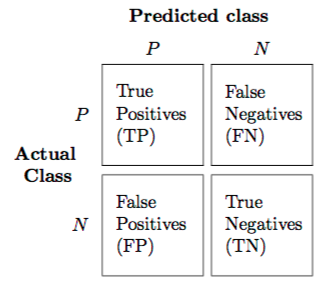


In [501]:
mnb_cfm = confusion_matrix(y_test_text, mnb_y_pred)
print("Confusion matrix:")
print(mnb_cfm, end='\n\n') 

Confusion matrix:
[[961   7]
 [ 32   0]]



In [487]:
spammers_index = list_res

In [502]:
# finding the words that are most used by the spammer 

spamers_dataframe = X_test_main.loc[spammers_index]
tt = spamers_dataframe.iloc[:, 21:46].values
df = pd.DataFrame(Counter(tt.ravel()), index={'Count'})
words = Counter(tt.ravel()).keys()
count = Counter(tt.ravel()).values()
word_count = pd.DataFrame({'word' : list(words), 'count' : list(count)}) 
word_count = word_count.sort_values(by=['count'],ascending=False)
word_count.head(30)

,count,word
57,26,amp
408,17,god
22,14,get
72,12,will
229,12,bro
174,12,top
37,11,don
406,11,bless
180,11,thank
34,10,can


# finding the words that are most used by the spammer using Naive Bayes

In the above result is based on the most word used by the spammer of Autoencoder and Svm Classifier. But It Neglected the fact that word most used by the spamer are also most used by the non spammer. i.e. We need word that have ratio with non spammer is  high. As, we have already trained our Naive Bayes with 0.961% accuracy. Now, our Naive Bayes algooritm is going to predict to most common word used by the spammer. Here We are Taking 20% as threshold i.e. non-spammer uses a word 100 times and if spamer used same word more than 20 times than we are going to count the number. 

Why we are taking only 20% threhold ratio for spamer not 100% ?

  Yes, We are taking 20 % as a threshold here because if we Compaire the numer of spamer and non-spamer. Obviously, the no-spammer count would be much higher. So, A particular Word used by non-spammers also much higher. if we set a threshold such that spammer uses a word more than certain threshold(our case 20%) Compaire to non-spammer. 


In [554]:
word_threshold = .3

In [561]:
# finding the words that are mostly used by the spammer 


X_train_tokens = vectorizer.get_feature_names()
ham_token_count = mnb.feature_count_[0, :]
spam_token_count = mnb.feature_count_[1, :]
tokens = pd.DataFrame({'token':X_train_tokens, 'non_spam':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens= tokens.sort_values(by=['spam'],ascending=False)
tokens[tokens.spam >= (tokens.non_spam)*word_threshold]

,non_spam,spam
token,,
followers,26.0,8.0
unfollowers,8.0,7.0
stats,14.0,6.0
doubt,8.0,6.0
super,12.0,5.0
songs,4.0,5.0
info,6.0,4.0
report,10.0,4.0
number,6.0,4.0


In [490]:
wordcloud = WordCloud(width=1200, hight=1000).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()